In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
%matplotlib inline

['train', 'test', 'depths.csv', 'train.csv', 'sample_submission.csv']


# 1. Run-length encoding convert to image

In [2]:
#convert to image
def rleToMask(rleString,height,width):
    #width heigh
    rows,cols = height,width
    try:
        #get numbers
        rleNumbers = [int(numstring) for numstring in rleString.split(' ')]
        #get pairs
        rlePairs = np.array(rleNumbers).reshape(-1,2)
        #create an image
        img = np.zeros(rows*cols,dtype=np.uint8)
        #for each pair
        for index,length in rlePairs:
            #get the pixel value 
            index -= 1
            img[index:index+length] = 255

        #reshape
        img = img.reshape(cols,rows)
        img = img.T
    
    #else return empty image
    except:
        img = np.zeros((cols,rows))
    
    return img

In [3]:
train_mask_df = pd.read_csv('../input/train.csv')
train_mask_df.head()

,id,rle_mask
0,575d24d81d,NaN
1,a266a2a9df,5051 5151
2,75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...
3,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...
4,4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...


## 1.1 Run by function-built

In [4]:
rle1 = train_mask_df.loc[train_mask_df['id']=='0c089f7c1b']['rle_mask']
rle1 = rle1.tolist()
rle1 = ' '.join(rle1)
rle1

'15 87 117 86 218 86 320 85 421 85 523 84 624 84 725 84 827 83 928 83 1029 83 1131 82 1232 82 1333 82 1434 82 1535 82 1636 82 1737 82 1838 82 1939 82 2040 82 2141 82 2242 82 2343 82 2443 83 2544 83 2645 83 2746 83 2846 84 2947 84 3048 84 3148 85 3249 85 3349 86 3449 87 3550 87 3650 88 3751 88 3851 89 3951 90 4052 90 4153 90 4253 91 4353 92 4451 95 4552 95 4652 96 4752 97 4850 5352'

In [5]:
img = rleToMask(rle1,101,101)
img

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

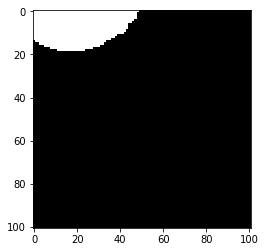

In [6]:
plt.imshow(img, cmap='Greys')

## 1.2 Step by step

In [7]:
# rleNumbers = [int(numstring) for numstring in '5051 5151'.split(' ')]
# rleNumbers = '5051 5151'.split(' ')
rleNumbers = [int(numstring) for numstring in rle1.split(' ')]
print(rleNumbers)
rlePairs = np.array(rleNumbers).reshape(-1,2)
rlePairs[:5]

[15, 87, 117, 86, 218, 86, 320, 85, 421, 85, 523, 84, 624, 84, 725, 84, 827, 83, 928, 83, 1029, 83, 1131, 82, 1232, 82, 1333, 82, 1434, 82, 1535, 82, 1636, 82, 1737, 82, 1838, 82, 1939, 82, 2040, 82, 2141, 82, 2242, 82, 2343, 82, 2443, 83, 2544, 83, 2645, 83, 2746, 83, 2846, 84, 2947, 84, 3048, 84, 3148, 85, 3249, 85, 3349, 86, 3449, 87, 3550, 87, 3650, 88, 3751, 88, 3851, 89, 3951, 90, 4052, 90, 4153, 90, 4253, 91, 4353, 92, 4451, 95, 4552, 95, 4652, 96, 4752, 97, 4850, 5352]


array([[ 15,  87],
       [117,  86],
       [218,  86],
       [320,  85],
       [421,  85]])

In [8]:
for index,length in rlePairs[:5]:
    print(index, length)

15 87
117 86
218 86
320 85
421 85


In [9]:
img1 = np.zeros(101*101,dtype=np.uint8)
for index,length in rlePairs:
    #get the pixel value 
    index -= 1
    img1[index:index+length] = 255
    
print(img1.shape,'\n', type(img1))

(10201,) 
 <class 'numpy.ndarray'>


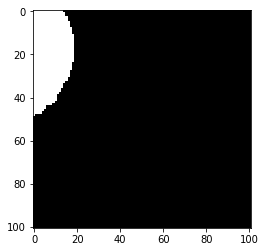

In [10]:
img1 = img1.reshape(101,101)
plt.imshow(img1,cmap='Greys')

**Issue**
the transpose doesn't flip black and white. It simply do transpose: flip row and column indices

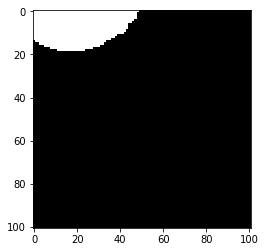

In [11]:
img1 = img1.T
plt.imshow(img1,cmap='Greys')

**Issue** Try to flip black and white

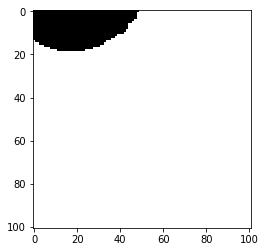

In [12]:
img1 = 255-img1
plt.imshow(img1,cmap='Greys')

[255 255 255   0   0 255 255 255 255]
[  0 255] [2 7]


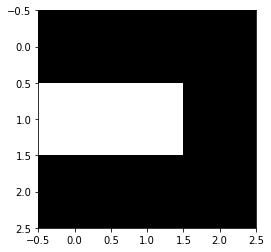

In [13]:
a = np.zeros(3*3, dtype=np.uint8)
a[:]=255
a[3:5]=0
print(a)
unique, counts = np.unique(a, return_counts=True)
print(unique, counts)
a = a.reshape(-1,3)
plt.imshow(a, cmap='Greys')

## 1.3 Details of decoding the run-length encoding

In [14]:
img2 = np.zeros(101*101,dtype=np.uint8)
img2[14:14+87] = 255 # 14+87=101
img2[116:116+86]=111 # 116-101=15, 15+86=101
img2[217:217+86]=222 # 217-202=15, 15+86=101
img2

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [15]:
img2.reshape(101,101)

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 111, 111, 111],
       [  0,   0,   0, ..., 222, 222, 222],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

# 2. salt_proportion invoke  np.unique

if doesn't flip black and white, the proportion will be wrong

In [16]:
def salt_proportion(imgArray):
    try: 
        unique, counts = np.unique(imgArray, return_counts=True)
        ## The total number of pixels is 101*101 = 10,201
        return counts[1]/10201.
    
    except: 
        return 0.0

In [17]:
print(img.shape)
img

(101, 101)


array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [18]:
print(img1.shape)
img1

(101, 101)


array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [19]:
salt_proportion(img)

0.9276541515537693

In [20]:
unique, counts = np.unique(img, return_counts=True)
print(unique, counts)

[  0 255] [ 738 9463]


In [21]:
counts[1]/(101*101)

0.9276541515537693

## 2.1 Run by function

In [22]:
rle2 = train_mask_df[train_mask_df['id']=='4875705fb0']['rle_mask']
print(type(rle2))
rle2

<class 'pandas.core.series.Series'>


4    1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...
Name: rle_mask, dtype: object

In [23]:
mask_img = rle2.apply(lambda x:rleToMask(x, 101, 101))
print(mask_img)
mask_img.apply(lambda x:salt_proportion(x))

4    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
Name: rle_mask, dtype: object


4    0.042839
Name: rle_mask, dtype: float64

## 2.2 Step by step

### 2.2.1 Pandas.Series.apply(lambda x: )

In [24]:
print(mask_img.shape)
print(type(mask_img))

(1,)
<class 'pandas.core.series.Series'>


In [25]:
salt_proportion(mask_img)

0.0

???????????????

In [26]:
mask_img_arr = mask_img.tolist()[0]
print(mask_img_arr)
print(mask_img_arr.shape)
print(type(mask_img_arr))
salt_proportion(mask_img_arr)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]
(101, 101)
<class 'numpy.ndarray'>


0.042838937359082445

### 2.2.2 Pass a string to fuction

In [27]:
rle2.tolist()
rle2 = ' '.join(rle2)
rle2

'1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716 2 1817 2 1918 2 2018 3 2119 3 2220 3 2321 3 2422 3 2523 3 2624 3 2725 3 2826 3 2927 3 3028 3 3129 3 3230 3 3331 3 3432 3 3533 3 3636 1 3737 1 3838 1 3938 2 4039 2 4140 2 4240 3 4341 3 4442 3 4542 4 4643 4 4744 4 4844 5 4945 5 5046 5 5146 6 5247 6 5347 7 5448 7 5549 7 5649 8 5750 8 5851 8 5952 8 6053 8 6154 8 6255 8 6355 9 6456 9 6557 9 6659 8 6760 8 6861 8 6962 8 7063 8 7164 8 7265 8 7367 7 7468 7 7569 7 7670 7 7772 6 7873 6 7974 6 8075 6 8177 5 8278 5 8379 5 8480 5 8582 4 8683 4 8784 4 8885 4 8986 4 9087 4 9188 4 9289 4 9389 5 9490 5 9591 5 9692 5 9792 6 9893 6 9993 7 10094 7 10194 8'

In [28]:
mask_img = rleToMask(rle2,101,101)
print(type(mask_img))
mask_img

<class 'numpy.ndarray'>


array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

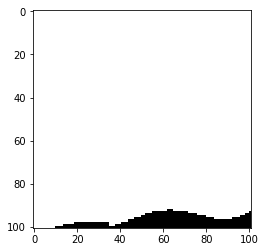

In [29]:
plt.imshow(mask_img, cmap='Greys')

In [30]:
salt_proportion(mask_img)

0.042838937359082445